In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import copy

norris = np.genfromtxt('Norris14.csv', unpack = True, names = True, delimiter = ',', skip_footer=0)

In [110]:
bad_norris = [i for i, val in enumerate(norris['Sig']) if val < 0]
# print bad_norris
norris_Re = [val for i, val in enumerate(norris['Re']) if i not in bad_norris]
norris_Sig = [val for i, val in enumerate(norris['Sig']) if i not in bad_norris]
# print norris_Sig
X = np.array([np.log10(norris_Re),np.log10(norris_Sig)]).T
Y = [val for i, val in enumerate(norris['type']) if i not in bad_norris]

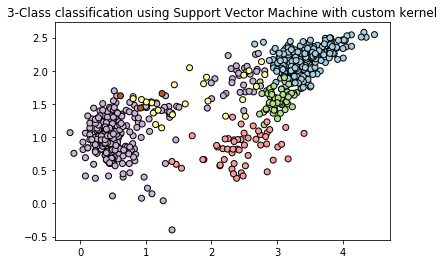

In [111]:
def my_kernel(X, Y):
    """
    We create a custom kernel:
                 (2  0)
    k(X, Y) = X  (    ) Y.T
                 (0  1)
    """
    M = np.array([[2, 0], [0, 1.0]])
    return np.dot(np.dot(X, M), Y.T)


h = 10  # step size in the mesh

# we create an instance of SVM and fit out data.
# clf = svm.SVC(kernel=my_kernel)
# clf.fit(X, Y)
clf = svm.SVC(kernel='poly', degree=4, C=1.0)
clf.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('3-Class classification using Support Vector Machine with custom'
          ' kernel')
plt.axis('tight')
plt.show()